In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../../../datasets/digit/train.csv')

In [6]:
df.shape

(42000, 785)

In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = df.drop('label', axis=1)

In [9]:
X.shape

(42000, 784)

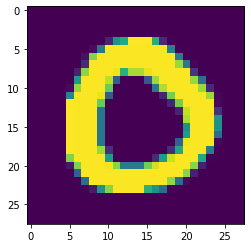

In [10]:
img = X.iloc[4].values.reshape(28,28)
plt.imshow(img)

In [11]:
X.shape

(42000, 784)

In [12]:
y = df['label']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=19)

In [14]:
X_train.shape

(33600, 784)

In [15]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [16]:
X_train_scaled.shape

(33600, 784)

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)

In [23]:
y_train_cat.shape

(33600, 10)

In [24]:
# Model Building

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(784,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist = model.fit(X_train_scaled, y_train_cat, epochs=20, batch_size=64)

Epoch 1/20
525/525 [==============================] - 2s 2ms/step - loss: 0.5577 - accuracy: 0.8516
Epoch 2/20
525/525 [==============================] - 1s 2ms/step - loss: 0.2602 - accuracy: 0.9239
Epoch 3/20
525/525 [==============================] - 1s 2ms/step - loss: 0.2053 - accuracy: 0.9388
Epoch 4/20
525/525 [==============================] - 1s 2ms/step - loss: 0.1726 - accuracy: 0.9491
Epoch 5/20
525/525 [==============================] - 1s 2ms/step - loss: 0.1506 - accuracy: 0.9553
Epoch 6/20
525/525 [==============================] - 1s 2ms/step - loss: 0.1357 - accuracy: 0.9589
Epoch 7/20
525/525 [==============================] - 1s 2ms/step - loss: 0.1236 - accuracy: 0.9629
Epoch 8/20
525/525 [==============================] - 1s 2ms/step - loss: 0.1139 - accuracy: 0.9662
Epoch 9/20
525/525 [==============================] - 1s 2ms/step - loss: 0.1038 - accuracy: 0.9683
Epoch 10/20
525/525 [==============================] - 1s 2ms/step - loss: 0.0982 - accuracy: 0.9701

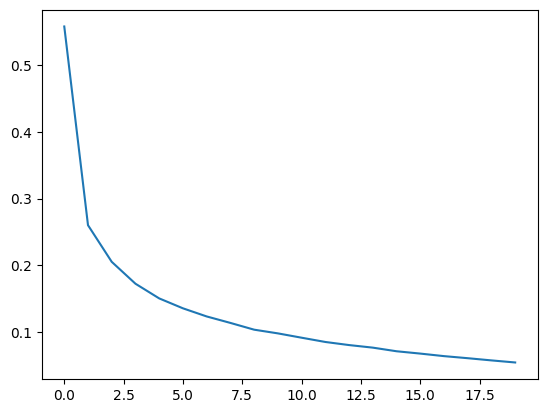

In [26]:
plt.plot(hist.history['loss'])

In [28]:
X_test_scaled.shape

(8400, 784)

In [29]:
model.evaluate(X_test_scaled,y_test_cat)

263/263 [==============================] - 3s 1ms/step - loss: 0.1633 - accuracy: 0.9600


[0.16332821547985077, 0.9599999785423279]

In [40]:
X_test_scaled.iloc[0:6].values.shape

(6, 784)

In [47]:
op = model.predict(X_test_scaled.iloc[0].values.reshape(1,784))

1/1 [==============================] - 0s 23ms/step


In [48]:
op.argmax(axis=1)

array([7], dtype=int64)

In [49]:
op

array([[2.5122024e-08, 8.8967013e-08, 1.9332607e-05, 4.7551976e-03,
        3.3874883e-05, 2.6092064e-05, 3.5737770e-11, 9.9046928e-01,
        4.2009438e-04, 4.2760428e-03]], dtype=float32)

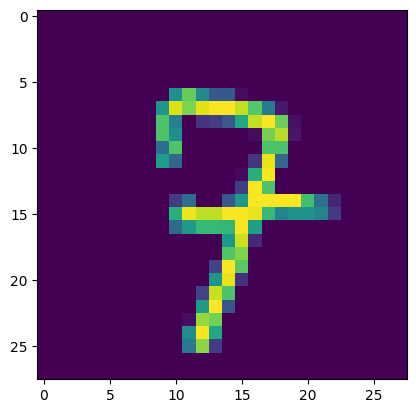

In [36]:
plt.imshow(X_test_scaled.iloc[0].values.reshape(28,28))

In [52]:
import os, cv2

In [51]:
os.listdir('../../datasets/digit_recognition/my_images/')

['0.jpg',
 '00.jpg',
 '1.jpg',
 '11.jpg',
 '2.jpg',
 '22.jpg',
 '3.jpg',
 '33.jpg',
 '4.jpg',
 '44.jpg',
 '5.jpg',
 '55.jpg',
 '6.jpg',
 '66.jpg',
 '7.jpg',
 '77.jpg',
 '8.jpg',
 '88.jpg',
 '9.jpg',
 '99.jpg']

In [19]:
# Predict on own images

In [20]:
def predict(path):
    A = cv2.imread(path, 0)
    A = cv2.resize(A,(28,28))
    A = A.reshape(1,784)/255
    return model.predict_on_batch(A).argmax()

In [75]:
for filename in filenames:
    digit = predict('../../datasets/digit_recognition/my_images/'+filename)
    print(filename,'\t',digit)

0.jpg 	 4
00.jpg 	 0
1.jpg 	 5
11.jpg 	 1
2.jpg 	 3
22.jpg 	 2
3.jpg 	 3
33.jpg 	 3
4.jpg 	 4
44.jpg 	 1
5.jpg 	 8
55.jpg 	 3
6.jpg 	 5
66.jpg 	 6
7.jpg 	 2
77.jpg 	 3
8.jpg 	 8
88.jpg 	 3
9.jpg 	 1
99.jpg 	 3


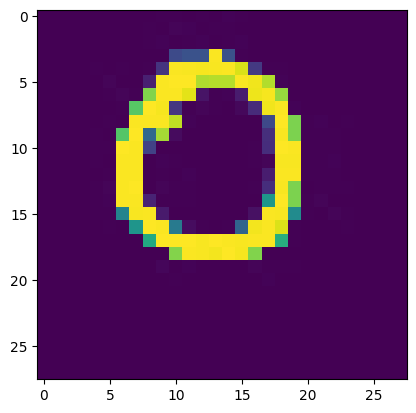

In [78]:
plt.imshow(A.reshape(28,28))